In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D


Pi=np.pi
from scipy.integrate import odeint

In [231]:
def makePath(x0, t, fun, params, plotColor):
    # The variable 'plotColor' is either set to 'bw' or 'clr'.  
    # 'fun' is the right hand side of your ODE.  
    Nstarting=np.size(x0,0)
    if plotColor == 'bw':
        colors = np.zeros([Nstarting, 3])
    elif plotColor == 'clr':
        cmap = plt.get_cmap('winter')
        colors = [cmap(i) for i in np.linspace(0, 1, Nstarting)]

    for ii in range(Nstarting):
        thisX0=x0[ii,:]
        x = odeint(fun, thisX0, t, args = (params,))
        indsc = x[:,1] <= Pi
        inds = x[:,1] > Pi
        # Enforce the symmetry implied by reversibility
        xref = -x[indsc,1] 
        plt.plot(x[indsc,0],xref,color=colors[ii])
        plt.plot(x[indsc,0],x[indsc,1],color=colors[ii])    

## Homework 6

**Problem 1** 10 pts) Let $G$ be a map from $\mathbb{R}^{n}\rightarrow \mathbb{R}^{n}$.  We say that it is an _involution_ if 

$$
G \cdot G = I
$$

For a dynamical system 

$$
\frac{d {\bf x}}{dt} = f\left({\bf x}\right),
$$

we say that it is _reversible_ if there exists an involution $G$ such that 

$$
\frac{d}{dt}\left(G{\bf x}\right) = -f\left(G{\bf x}\right)
$$

* (2pts) Explain how our definition of reversability fits within the definition given above.
* (3pts) In $\mathbb{R}^{2}$, find at least two other involutions which lead to a reversible dynamical system. 
* (5pts) For your choices above, show that in each case that if the dynamical system has a fixed point at the origin with strictly imaginary spectra that it is in fact a nonlinear center.  

**Problem 2** 10 pts) For the dynamical system

$$
\frac{d}{dt}\begin{pmatrix}x \\ y \end{pmatrix} = \begin{pmatrix} 0 & \omega \\ -\omega & 0\end{pmatrix}\begin{pmatrix}x \\ y \end{pmatrix} + \begin{pmatrix} \alpha_{1}x^{2} + \beta_{1}xy + \gamma_{1}y^{2}\\ \alpha_{2}x^{2} + \beta_{2}xy + \gamma_{2}y^{2} \end{pmatrix}
$$

* (4pts) First, rescale the system to try to eliminate as many parameters as possible.
* (6pts) Determine in your rescaled systems which remaining parameter choices lead to the fixed point at the origin being a nonlinear center.  

_Hints and Thoughts_: So one way to tackle this problem is that after rescaling, first list out all the cases with a noteworthy symmetry, i.e. which cases lead to exact systems of equations, which to reversible and so forth.  

Then, we get to have some fun.  If we rescale $\omega=1$, show that letting $z = x+iy$, we can rewrite our ODE as 

$$
\dot{z} = -iz + \tilde{\alpha}_{1}z^{2} + \tilde{\beta}_{1}|z|^{2} + \tilde{\gamma}_{1}(z^{\ast})^{2},
$$

with the corresponding equation for the dynamics of the complex conjugate $z^{\ast} = x-iy$ being understood.  Something like SAGE is your friend in terms of determining the new coefficients in terms of the old.  

Now, as with normal-form theory in one dimension, let 

$$
z = w + h_{2}(w,w^{\ast}), 
$$

where 

$$
h_{2}(w,w^{\ast}) = c_{0}w^{2} + c_{1}ww^{\ast} + c_{2}(w^{\ast})^{2}, 
$$

i.e. it is some arbitrary linear combination of second degree terms.  Note, the $c_{j}\in \mathbb{C}$.  Again, throughout all of this, we are supposing that $z$ and therefore $w$ is small.  Thus, $h_{2}(w,w^{\ast})$ is smaller yet still since $h_{2}(w,w^{\ast})=\mathcal{O}(|w|^{2})$.  Using this fact, and the geometric series result that 

$$
\frac{1}{1+\tilde{w}} = 1 -\tilde{w} + \mathcal{O}(\tilde{w}^{2}), ~ \tilde{w}\in \mathbb{C}, ~|\tilde{w}|<1
$$

show that 

$$
\dot{w} = -iw - ih_{2} + iw\frac{\partial h_{2}}{\partial w} - iw^{\ast}\frac{\partial h_{2}}{\partial w^{\ast}} + \tilde{\alpha}_{1}w^{2} + \tilde{\beta}_{1}|w|^{2} + \tilde{\gamma}_{1}(w^{\ast})^{2} + \mathcal{O}\left(|w|^{3}\right)
$$

Then show that you can choose the $c_{j}$-terms so that 

$$
\dot{w} = -iw + \mathcal{O}\left(|w|^{3}\right).
$$

In other words, show that the second-order terms can be completely removed. We'll continue this tale in a later assignment, but suffice to say, you should hopefully see now how delicate a question of what a center is is.  

**Problem 3** 10 pts) 6.6.8 (2pts, 3pts, 2pts, 3pts)

In [221]:
# Our vector field i.e. right-hand side of our ODE
def fcylndr(xvec, t, beta):
    # Unpack vector with solution and bifurcation parameter
    x,phi = xvec[0],xvec[1]
    
    # Make the arithmetic pretty
    sq2 = np.sqrt(2.)
    sph = np.sin(phi)
    cph = np.cos(phi) 
    
    # Define right-hand side
    xdot = sq2/4.*x*(x-1.)*sph
    phidot = .5*(beta-cph/sq2 - x*cph/(8.*sq2))
    
    return np.array([xdot,phidot])

In [237]:
# So we want to ensure some key paths appear.  In particular, anything 
# that is either homoclinic or heteroclinic should make it into our plot.

def cylinder_plotter(beta,noprts,dlt,tf):
    sq2 = np.sqrt(2)
    tvec = np.linspace(0.,tf,1e4)
    perts = np.zeros((noprts,2))
    
    # Sink along x=1
    # Build initial conditions that are perturbations away from your fixed 
    # point since we want to plot nearby paths. 
    if beta > 1./sq2:
        fpprts = np.zeros((noprts*2,2))
        fppts = np.zeros((2,2))
    else:
        fpprts = np.zeros((noprts*3,2))
        fppts = np.zeros((3,2))
        
    # Source along x=1 
    fppts[0,:] = np.array([1.,np.arccos(8.*sq2*beta/9.)])
    perts[:,0] = -dlt*np.random.rand(noprts)
    perts[:,1] = 10.*dlt*(np.random.rand(noprts)-.5)
    fpprts[0:noprts,:] = fppts[0,:] + perts
        
    if beta > 1./sq2:
        # Saddle for the homoclinic
        fppts[1,:] = np.array([8.*(sq2*beta-1.),0])
        perts[:,0] = 5.*dlt*(np.random.rand(noprts)-.5)
        perts[:,1] = 10.*dlt*(np.random.rand(noprts)-.5)
        fpprts[noprts:,:] = fppts[1,:] + perts
    else:
        # Saddles along x=0
        fppts[1,:] = np.array([0., np.arccos(sq2*beta)]) 
        fppts[2,:] = np.array([0., -np.arccos(sq2*beta)])
        perts[:,0] = dlt*np.random.rand(noprts)
        perts[:,1] = 10.*dlt*(np.random.rand(noprts)-.5)
        fpprts[noprts:2*noprts,:] = fppts[1,:] + perts
        fpprts[2*noprts:,:] = fppts[2,:] + perts
        
    makePath(fpprts, tvec, fcylndr, beta, 'clr')
    plt.scatter(fppts[:,0],fppts[:,1],color='k')
    plt.scatter(1.,-np.arccos(8.*sq2*beta/9.),color='k')
    plt.xlabel('$x$')
    plt.ylabel('$\phi$')

C:\Users\ccurtis\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


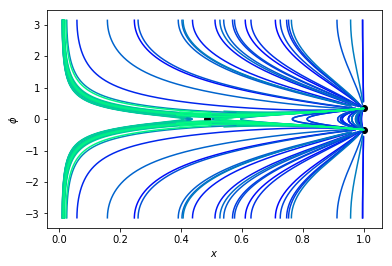

In [243]:
cylinder_plotter(.75,40,.05,80)

C:\Users\ccurtis\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


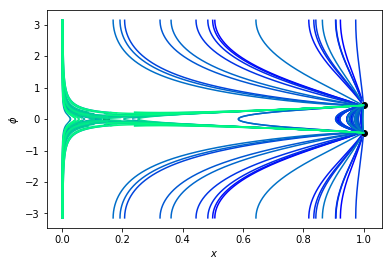

In [244]:
cylinder_plotter(.72,40,.05,80)

C:\Users\ccurtis\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


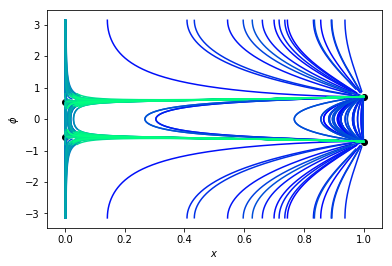

In [245]:
cylinder_plotter(.6,40,.05,80)